### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 6

#### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Ким Реачна
##### Группа:  НПИбд-01-20

## Москва 2023
***

### Вариант № 19

Для закрепленного за Вами варианта лабораторной работы:

1. Считайте заданный набор данных из репозитария UCI, включая указанный в индивидуальном задании столбец с метками классов. 

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
target = 8
name1 = 'ecoli.data'

In [3]:
df = pd.read_csv("../data/ecoli.data",
                 delimiter="  ", header=None, on_bad_lines='skip')
df.head()

,0,1,2,3,4,5,6,7,8
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


2. Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Преобразуйте категориальные признаки в числовые при помощи кодирования меток (label encoding). Если в признаках имеются пропущенные значения, то замените пропущенные значения, используя метод, указанный в индивидуальном задании. Если в признаках пропущенных значений нет, то удалите из набора данных записи, идентифицированные как выбросы при помощи метода кластеризации DBSCAN.

In [4]:
df = df.replace('?', np.NaN)
print('Число записей = %d' % (df.shape[0]))
print('Число признаков = %d' % (df.shape[1]))
print('Число пропущенных значений:')
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isna().sum()))

Число записей = 335
Число признаков = 9
Число пропущенных значений:
	0: 0
	1: 0
	2: 0
	3: 0
	4: 0
	5: 0
	6: 0
	7: 0
	8: 0


In [5]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
for i in df.columns:
    df[i] = lb_make.fit_transform(df[i])

In [6]:
df[target].value_counts()

0    142
1     77
3     52
6     35
2     20
7      5
5      2
4      2
Name: 8, dtype: int64

In [7]:
df = df.astype(float)

In [8]:
from sklearn.cluster import DBSCAN
X = df.values
dbscan = DBSCAN(eps=30, min_samples=5)
dbscan.fit(X)
cluster_labels = dbscan.labels_
pd.Series(cluster_labels).value_counts()

 0    309
-1     19
 1      7
dtype: int64

In [9]:
df = df[cluster_labels != -1]

3. Используя метод снижения размерности данных, указанный в индивидуальном задании, определите и оставьте в наборе данных не более четырех признаков.

In [10]:
X = df.astype(float).values
y = df[target].astype(int)

In [11]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf.fit(X, y)
feature_importances = clf.feature_importances_
top_k_indices = np.argsort(feature_importances)[::-1][:4]
X_2 = X[:, top_k_indices]

4. Нормализуйте оставшиеся признаки набора данных методом, указанным в индивидуальном задании.

In [12]:
X = X_2.astype(float)
y = df[target].astype(int)

In [13]:
X[:5]

array([[ 0., 14., 21., 39.],
       [ 0., 25., 30.,  3.],
       [ 0., 27., 32., 46.],
       [ 0., 35., 22., 49.],
       [ 0., 15., 21., 13.]])

In [14]:
from sklearn.preprocessing import MinMaxScaler

np.set_printoptions(precision=3)

scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)

5. Визуализируйте набор данных в виде точек в трехмерном пространстве, отображая точки разных классов разными цветами. При визуализации набора данных используйте три признака с наиболее высокой оценкой важности. В качестве подписей осей используйте названия признаков. В подписи рисунка укажите название набора данных. Создайте легенду набора данных.

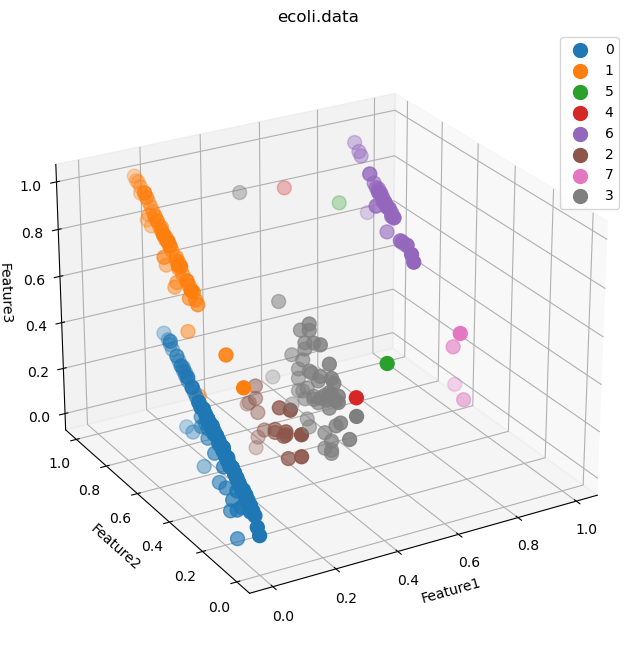

In [15]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

for i in (y.unique()):
    row_ix = np.where(y== i)
    a=X[row_ix, 0]
    b=X[row_ix, 1]
    c=X[row_ix, 2]
    ax.scatter(a, b, c,s=100,label=i)

plt.title(name1)
ax.set_xlabel('Feature1')
ax.set_ylabel('Feature2')
ax.set_zlabel('Feature3')
plt.legend()

ax.view_init( azim=-120, elev=25 );

6. Разбейте набор данных на обучающую и тестовую выборки. Создайте и обучите классификатор на основе деревьев решений с глубиной дерева не более 4, определите долю верных ответов на тестовой выборке и визуализируйте границу принятия решений и построенное дерево решений. При визуализации границы принятия решений используйте два признака с наиболее высокой оценкой важности.

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=666)

In [17]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=4, random_state=2)  
dt_clf.fit(X_train, y_train);

In [18]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, dt_clf.predict(X_test))

0.9894736842105263

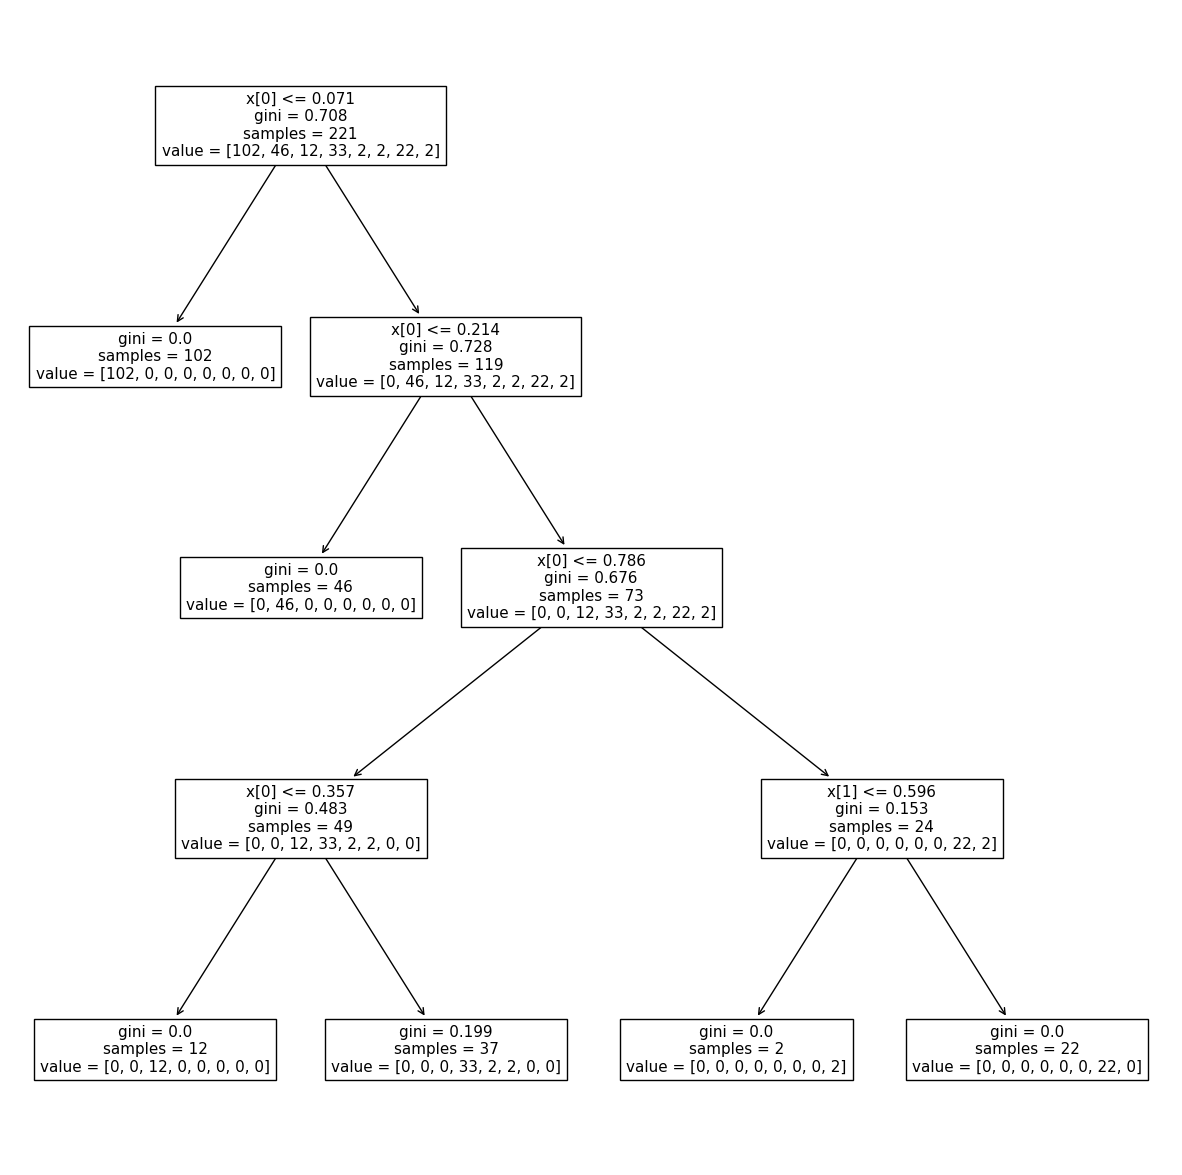

In [19]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,15))
plot_tree(dt_clf);

Text(0, 0.5, 'Feature2')

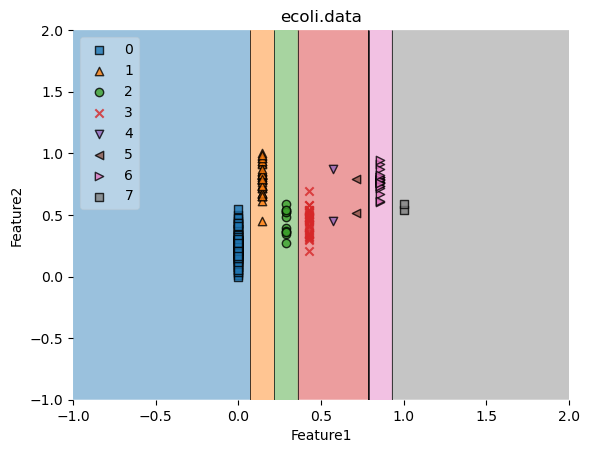

In [20]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train[:,:2], y_train.values, clf=dt_clf.fit(X_train[:,:2], y_train), legend=2, zoom_factor=1)
plt.title(name1)
plt.xlabel('Feature1')
plt.ylabel('Feature2')

7. Постройте и обучите дополнительные базовые классификаторы, указанные в индивидуальном задании, затем постройте из классификатора дерева решений и дополнительных классификаторов комбинированный классификатор, указанный в индивидуальном задании. Оцените производительность базовых классификаторов и комбинированного классификатора по показателю, указанному в индивидуальном задании. 

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

clf1 = GaussianNB()
clf2 = KNeighborsClassifier(n_neighbors=7)

In [22]:
from sklearn.ensemble import VotingClassifier

clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)

clf3 = VotingClassifier(estimators=[
    ('clf1', clf1),
    ('clf2', clf2),
    ('dt', dt_clf)
], voting='hard')

clf3.fit(X_train, y_train);

In [23]:
from sklearn.metrics import jaccard_score

score = jaccard_score

In [24]:
base_classifiers = [clf1, clf2, clf3]
classifier_names = [clf1, clf2, clf3]

for clf, name in zip(base_classifiers, classifier_names):
    y_pred = clf.predict(X_test)
    accuracy = score(y_test, y_pred, average='weighted')
    print(f'{name} score: {accuracy:.2f}')

GaussianNB() score: 1.00
KNeighborsClassifier(n_neighbors=7) score: 0.88
VotingClassifier(estimators=[('clf1', GaussianNB()),
                             ('clf2', KNeighborsClassifier(n_neighbors=7)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=4,
                                                     random_state=2))]) score: 0.98


8. Постройте и обучите пару ансамблевых классификаторов, указанных в индивидуальном задании, и сравните их производительность по показателю, указанному в индивидуальном задании. 

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

clf1 = BaggingClassifier()
clf2 = RandomForestClassifier()

In [26]:
clf1.fit(X_train, y_train);
clf2.fit(X_train, y_train);

y_pred_1 = clf1.predict(X_test)
y_pred_2 = clf2.predict(X_test)

score_1 = score(y_test, y_pred_1, average='weighted')
score_2 = score(y_test, y_pred_2, average='weighted')

print(f'Сlf1 score: {score_1:.2f}')
print(f'Сlf2 score: {score_2:.2f}')

Сlf1 score: 1.00
Сlf2 score: 0.97


9. Постройте границы принятия решений ансамблевых классификаторов с визуализацией точек набора данных разных классов разными цветами. Подпишите оси и рисунок. 

Text(0, 0.5, 'Feature2')

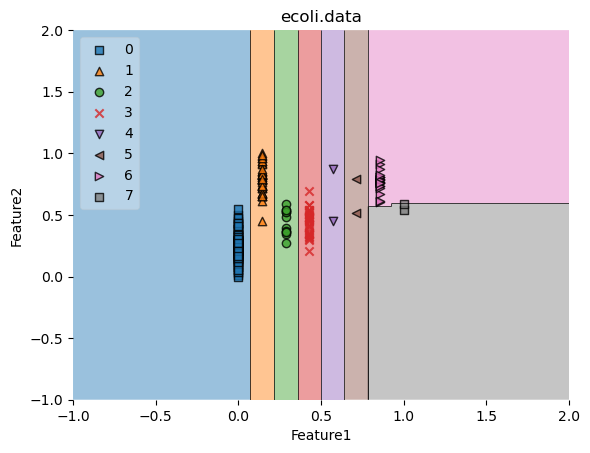

In [27]:
plot_decision_regions(X_train[:,:2], y_train.values, clf=clf1.fit(X_train[:,:2], y_train), legend=2, zoom_factor=1)
plt.title(name1)
plt.xlabel('Feature1')
plt.ylabel('Feature2')

Text(0, 0.5, 'Feature2')

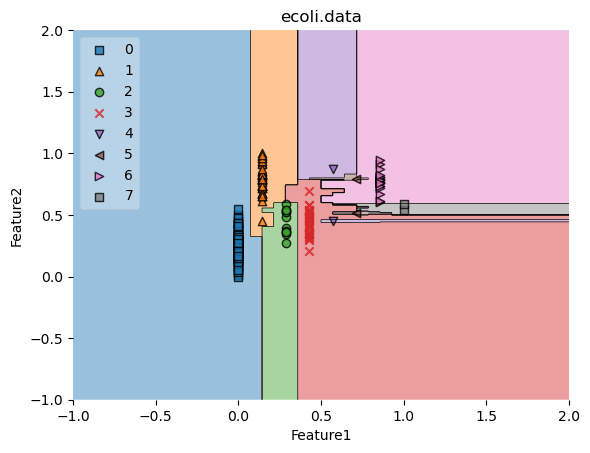

In [28]:
plot_decision_regions(X_train[:,:2], y_train.values, clf=clf2.fit(X_train[:,:2], y_train), legend=2, zoom_factor=1)
plt.title(name1)
plt.xlabel('Feature1')
plt.ylabel('Feature2')